In [ ]:
TReNDS - PyCaret (Training + Inference)

In [ ]:
https://www.kaggle.com/rohitsingh9990/trends-pycaret-training-inference

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold

#import regression module
from pycaret.regression import *

In [2]:
BASE_PATH = './input/trends-assessment-prediction'

fnc_df = pd.read_csv(f"{BASE_PATH}/fnc.csv")
loading_df = pd.read_csv(f"{BASE_PATH}/loading.csv")
labels_df = pd.read_csv(f"{BASE_PATH}/train_scores.csv")

In [5]:
fnc_df.head()

,Id,SCN(53)_vs_SCN(69),SCN(98)_vs_SCN(69),SCN(99)_vs_SCN(69),SCN(45)_vs_SCN(69),ADN(21)_vs_SCN(69),ADN(56)_vs_SCN(69),SMN(3)_vs_SCN(69),SMN(9)_vs_SCN(69),SMN(2)_vs_SCN(69),...,CBN(13)_vs_DMN(94),CBN(18)_vs_DMN(94),CBN(4)_vs_DMN(94),CBN(7)_vs_DMN(94),CBN(18)_vs_CBN(13),CBN(4)_vs_CBN(13),CBN(7)_vs_CBN(13),CBN(4)_vs_CBN(18),CBN(7)_vs_CBN(18),CBN(7)_vs_CBN(4)
0,10001,0.368580,0.166876,0.438148,0.341007,-0.186251,0.049096,0.121417,-0.174268,-0.231578,...,-0.149279,0.552841,0.131046,0.335446,0.394867,-0.042853,0.124627,-0.060712,0.515964,0.290488
1,10002,0.151696,-0.024819,0.217504,0.418072,-0.227234,-0.064052,-0.143832,-0.118116,-0.054825,...,-0.214216,-0.039792,0.143014,-0.189962,0.498373,0.444231,0.592438,0.028649,0.705524,0.248327
2,10003,0.343415,0.109974,0.741641,0.578558,-0.676446,-0.436960,-0.295663,-0.377790,-0.344963,...,-0.154941,0.136850,-0.022361,0.137625,0.677972,0.409412,0.563892,0.438684,0.618204,0.284474
3,10004,0.132793,0.258255,0.490769,0.342717,0.091112,0.107969,0.029220,-0.026237,0.094742,...,-0.130339,0.309540,0.141469,0.030853,0.344394,0.214097,0.317556,0.012435,0.665937,0.081358
4,10005,0.291921,0.251254,0.416470,0.511719,-0.362626,-0.164710,-0.289059,-0.015537,-0.087316,...,-0.139525,0.394932,0.040443,0.428334,0.498837,0.266755,0.227379,0.028984,0.752343,0.087898


In [6]:
loading_df.head()

,Id,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,...,IC_08,IC_03,IC_21,IC_28,IC_11,IC_20,IC_30,IC_22,IC_29,IC_14
0,10001,0.006070,0.014466,0.004136,0.000658,-0.002742,0.005033,0.016720,0.003484,0.001797,...,0.018246,0.023711,0.009177,-0.013929,0.030696,0.010496,0.002892,-0.023235,0.022177,0.017192
1,10002,0.009087,0.009291,0.007049,-0.002076,-0.002227,0.004605,0.012277,0.002946,0.004086,...,0.014635,0.022556,0.012004,-0.011814,0.022479,0.005739,0.002880,-0.016609,0.025543,0.014524
2,10003,0.008151,0.014684,0.010444,-0.005293,-0.002913,0.015042,0.017745,0.003930,-0.008021,...,0.019565,0.030616,0.018184,-0.010469,0.029799,0.015435,0.005211,-0.028882,0.031427,0.018164
3,10004,0.004675,0.000957,0.006154,-0.000429,-0.001222,0.011755,0.013010,0.000193,0.008075,...,0.002658,0.022266,0.005956,-0.010595,0.024078,-0.000319,0.005866,-0.015182,0.024476,0.014760
4,10005,-0.000398,0.006878,0.009051,0.000369,0.000336,0.010679,0.010352,0.003637,0.004180,...,0.009702,0.017257,0.005454,-0.008591,0.019416,0.000786,0.002692,-0.019814,0.017105,0.013316


In [3]:
fnc_features, loading_features = list(fnc_df.columns[1:]), list(loading_df.columns[1:])
df = fnc_df.merge(loading_df, on="Id")
labels_df["is_train"] = True
df = df.merge(labels_df, on="Id", how="left")

test_df = df[df["is_train"] != True].copy()
df = df[df["is_train"] == True].copy()
print(f'Shape of train data: {df.shape}, Shape of test data: {test_df.shape}')

Shape of train data: (5877, 1411), Shape of test data: (5877, 1411)


In [7]:
target_cols = ['age', 'domain1_var1', 'domain1_var2', 'domain2_var1', 'domain2_var2']
df.drop(['is_train'], axis=1, inplace=True)
test_df = test_df.drop(target_cols + ['is_train'], axis=1)


# Giving less importance to FNC features since they are easier to overfit due to high dimensionality.
FNC_SCALE = 1/500
df[fnc_features] *= FNC_SCALE
test_df[fnc_features] *= FNC_SCALE

In [8]:
def get_train_data(target):
    other_targets = [tar for tar in target_cols if tar != target]
    train_df = df.drop( other_targets, axis=1)
    return train_df

In [9]:
target = 'age'

train_df = get_train_data(target)

setup_reg = setup(
    data = train_df,   #test data를 분릴를 안하는 구나?
    target = target,
    train_size=0.8,
    numeric_imputation = 'mean',
    silent = True
)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,852
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(5877, 1406)"
4,Missing Values,False
5,Numeric Features,1405
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
# There are few models which take a lot of time, ignoring those models to make demo faster.
blacklist_models = ['ransac', 'tr', 'rf', 'et', 'ada', 'gbr', 'xgboost', 'catboost']

In [ ]:
compare_models()

In [14]:
compare_models(
    exclude = blacklist_models,
    fold = 5,
    sort = 'MAE', ## competition metric
    turbo = True
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Bayesian Ridge,7.2666,84.8384,9.2084,0.5417,0.2085,0.1700,2.7274
1,Orthogonal Matching Pursuit,7.6520,94.2193,9.7057,0.4908,0.2188,0.1781,0.1398
2,Light Gradient Boosting Machine,7.8553,98.3602,9.9152,0.4686,0.2234,0.1848,4.5878
3,Linear Regression,8.8712,126.4717,11.2433,0.3164,0.2488,0.2017,0.6322
4,Ridge Regression,10.1605,159.1218,12.6115,0.1406,0.2785,0.2437,0.1302
5,Least Angle Regression,10.7445,202.7681,13.5962,-0.0956,0.3224,0.2413,0.9156
6,Support Vector Machine,11.0502,185.9195,13.6325,-0.0043,0.2981,0.2654,23.2503
7,Lasso Least Angle Regression,11.0505,185.7486,13.6262,-0.0033,0.2975,0.2643,0.1156
8,Lasso Regression,11.0542,185.8544,13.6301,-0.0039,0.2975,0.2644,0.0784
9,Elastic Net,11.0542,185.8546,13.6301,-0.0039,0.2975,0.2644,0.0730


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [15]:
lgbm_age = create_model(
    estimator='lightgbm',
    fold=5
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.0025,101.0576,10.0527,0.4590,0.2260,0.1857
1,8.0007,100.6366,10.0318,0.4841,0.2230,0.1867
2,7.5071,92.6167,9.6238,0.4587,0.2174,0.1782
3,8.0324,103.8435,10.1904,0.4509,0.2330,0.1934
4,7.7337,93.6467,9.6771,0.4902,0.2174,0.1801
Mean,7.8553,98.3602,9.9152,0.4686,0.2234,0.1848
SD,0.2050,4.4210,0.2235,0.0156,0.0059,0.0054


In [ ]:
tune_model(

In [17]:
# here we are tuning the above created model
tuned_lgbm_age = tune_model(
    estimator=lgbm_age,
    fold=5
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.8120,122.8141,11.0822,0.3425,0.2460,0.2033
1,8.6328,118.5069,10.8861,0.3925,0.2362,0.1980
2,8.0809,104.6876,10.2317,0.3881,0.2290,0.1910
3,8.7484,124.3075,11.1493,0.3427,0.2523,0.2096
4,8.2933,109.3533,10.4572,0.4047,0.2336,0.1940
Mean,8.5135,115.9339,10.7613,0.3741,0.2394,0.1992
SD,0.2807,7.6663,0.3583,0.0263,0.0085,0.0067


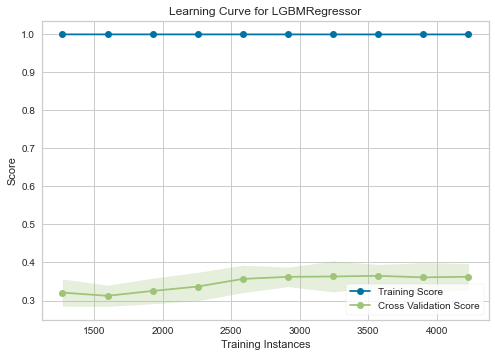

In [18]:
# plot_model(estimator = None, plot = ‘residuals’)
plot_model(estimator = tuned_lgbm_age, plot = 'learning')